# Re running anomalous results at high res

In [1]:
from WIPL_python_analysis.SinglePolPlots import SinglePolPlots
from WIPL_python_analysis.DualPol import DualPol
from WIPL_python_analysis.DictToSinglePolResults import OutputDictToSinglePolResultsConverter as converter
import sys
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('./')

In [2]:
def wavelength(frequencies):
    return 3e10 / (np.array(frequencies) * 1e9)

In [3]:
# Data as a dictionary
dielectrics = pd.DataFrame({
    'F Ghz': [2, 2.7, 3.7, 4.9, 6.7, 9.0, 12, 16, 22, 30],
    'Re Mirk': [47, 46, 44, 41, 40, 35, 30, 25, 20, 15],
    'Im Mirk': [20, 19, 19, 19, 19, 19, 19, 19, 19, 19],
    'Re Chit': [5.3, 5.2, 5.2, 5.1, 5.1, 5.0, 5.0, 4.9, 4.9, 4.8],
    'Im Chit': [0.11, 0.12, 0.12, 0.12, 0.12, 0.12, 0.13, 0.13, 0.13, 0.13]
})

# Calculate the new columns
dielectrics['Mirk Magnitude'] = np.sqrt(dielectrics['Re Mirk']**2 + dielectrics['Im Mirk']**2)
dielectrics['Chit Magnitude'] = np.sqrt(dielectrics['Re Chit']**2 + dielectrics['Im Chit']**2)
dielectrics['Wing Importance'] = dielectrics['Re Chit'] / dielectrics['Re Mirk']

# Load data

In [4]:
BASE_DRIVE_PATH = '/Users/sstk4353/Library/CloudStorage/GoogleDrive-thomas.matthews@ncas.ac.uk/My Drive/WIPL/Bernard_ellipsoid_comparison/'

In [5]:
proj_keys = ['0206_H_020', '0206_H_037', '0553_H_027', '1000_V_027']

load_paths = {
    '0206_H_020' : BASE_DRIVE_PATH + 'Bernard/0206/H_DICT_PKL/Bernard_H_0250_0206_020',
    '0206_H_037' : BASE_DRIVE_PATH + 'Bernard/0206/H_DICT_PKL/Bernard_H_0250_0206_037',
    '0553_H_027' : BASE_DRIVE_PATH + 'Bernard/0553/H_DICT_PKL/Bernard_H_0250_0553_027',
    '1000_V_027' : BASE_DRIVE_PATH + 'Bernard/1000/V_DICT_PKL/Bernard_12_Full_M_0250_1000_V_027.pkl',
}

save_paths = {
    '0206_H_020' : BASE_DRIVE_PATH + 'Bernard/0206/H_CSV/Bernard_H_0250_0206_020',
    '0206_H_037' : BASE_DRIVE_PATH + 'Bernard/0206/H_CSV/Bernard_H_0250_0206_037',
    '0553_H_027' : BASE_DRIVE_PATH + 'Bernard/0553/H_CSV/Bernard_H_0250_0553_027',
    '1000_V_027' : BASE_DRIVE_PATH + 'Bernard/1000/V_CSV/Bernard_12_Full_M_0250_1000_V_027.pkl',
}

In [6]:
for name in proj_keys:
            conv = converter.from_pickle(load_paths[name])
            df = conv.generate_output_df()

            df.to_csv(save_paths[name])

In [7]:
results = {
    '0206_H_020' : pd.read_csv(save_paths['0206_H_020']),
    '0206_H_037' : pd.read_csv(save_paths['0206_H_037']),
    '0553_H_027' : pd.read_csv(save_paths['0553_H_027']),
    '1000_V_027' : pd.read_csv(save_paths['1000_V_027']),
}

In [8]:
def plot_corrected_rcs(df, title=None):
    phi = df['phi']
    corrected_rcs = df['Corrected_RCS']
    
    plt.figure(figsize=(8, 6))
    plt.plot(phi, corrected_rcs, label='Corrected RCS')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Corrected RCS (cm^2)')

    if title:
        plt.title(title)

    plt.legend()
    plt.show()

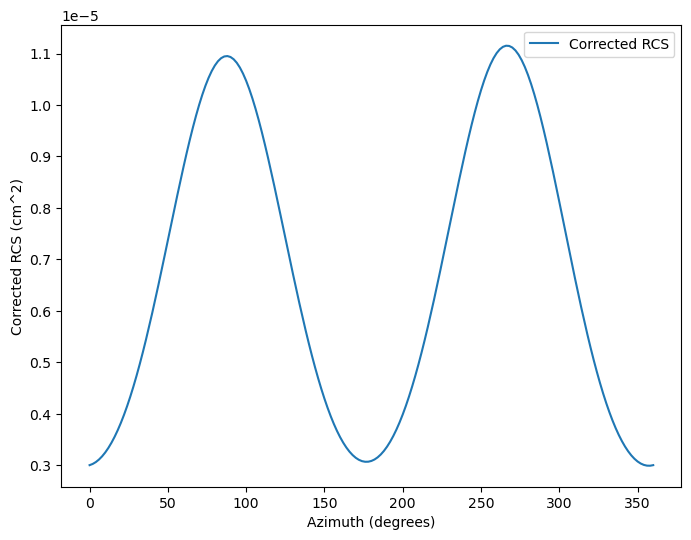

In [9]:
plot_corrected_rcs(results['0553_H_027'])

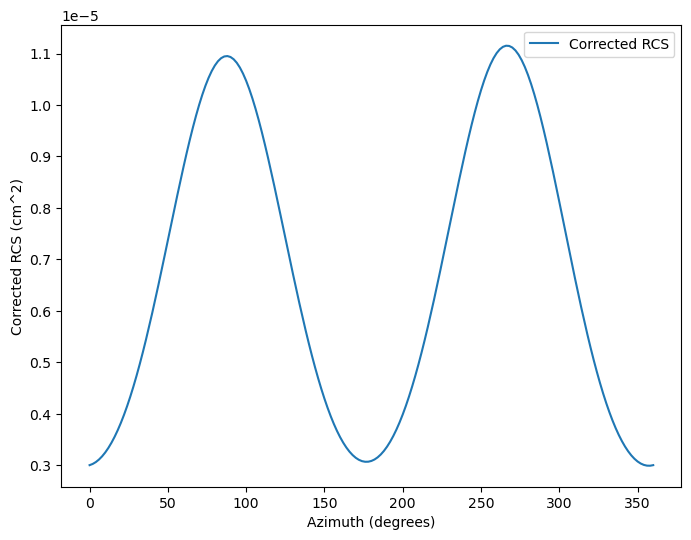

In [10]:
plot_corrected_rcs(results['0553_H_027'])

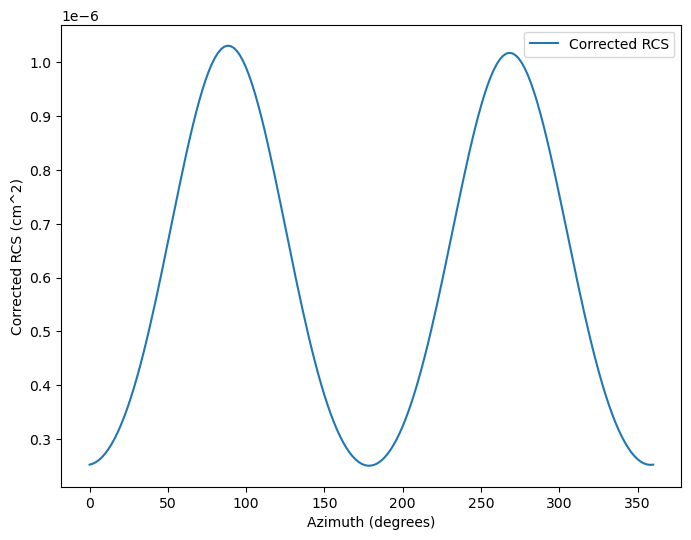

In [11]:
plot_corrected_rcs(results['0206_H_037'])

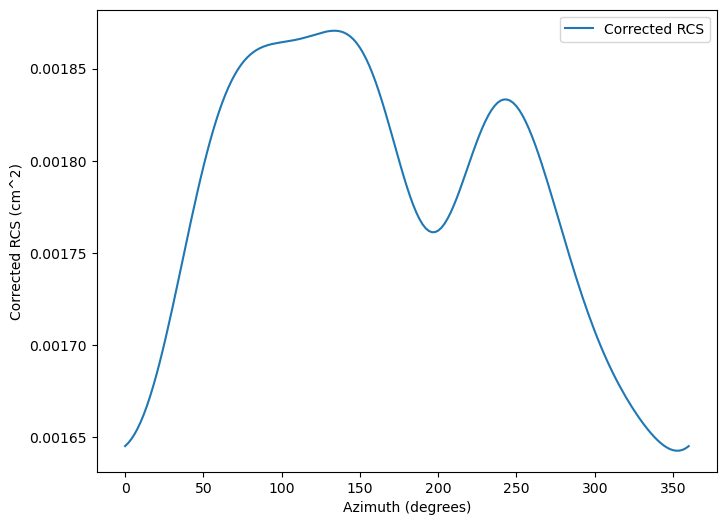

In [12]:
plot_corrected_rcs(results['1000_V_027'])

In [13]:
import joblib

In [14]:
joblib.dump(results['1000_V_027'], 'temp.pkl')

['temp.pkl']

# Vertical 1000 sweep high res

In [15]:
frequency_name_list = ['020', '027', '037', '049', '056', '067']
frequencies = [2,2.7,3.7,4.9,5.6,6.7]

Generate csvs for high res V Bernards

In [16]:
for scale in ['1000']:
    for polarisation in ['V']:
        for freq in frequency_name_list:    
            path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_DICT_PKL/' + f'Bernard_0250_{scale}_{polarisation}_{freq}.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_CSV/' + f'Bernard_0250_{scale}_{polarisation}_{freq}_df.csv'

            df.to_csv(output_path)

csv for new ellipsoid

In [17]:
path = BASE_DRIVE_PATH + f'Ellipsoid/1000/' + f'V_DICT_PKL/' + f'Ellipsoid_1000_V_056.pkl'
output_path = BASE_DRIVE_PATH +  f'ElLipsoid/1000/' + f'V_CSV/' + f'Ellipsoid_1000_sweep_V_056_df.csv'

conv = converter.from_pickle(path)
df = conv.generate_output_df()
df.to_csv(output_path)

Dictionary for storing outputs

In [18]:
single_pol_obj_dict = {y : {x : {'V' : [], 'V_no_leg' : []} for x in  ['0553', '1000']} for y in ['Bernard', 'Ellipsoid']}

In [19]:
model = 'Ellipsoid'
pol = 'V'


for freq in frequency_name_list:
    path = BASE_DRIVE_PATH + 'Ellipsoid/' + f'{scale}/{pol}_CSV/' + f'{model}_{scale}_sweep_{pol}_{freq}_df.csv'
    single_pol_obj_dict[model][scale][pol].append(pd.read_csv(path))

In [20]:
model = 'Bernard'
pol = 'V'


for freq in frequency_name_list:
    path = BASE_DRIVE_PATH + f'{model}/' + f'{scale}/{pol}_CSV/' + f'{model}_0250_{scale}_{pol}_{freq}_df.csv'
    single_pol_obj_dict[model][scale][pol].append(pd.read_csv(path))

In [21]:
V_corrs = []
V_mean_ratio = []

for freq in range(len(frequency_name_list)):
    V_corrs.append(single_pol_obj_dict['Bernard']['1000']['V'][freq]['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid']['1000']['V'][freq]['Corrected_RCS']))
    V_mean_ratio.append(single_pol_obj_dict['Bernard']['1000']['V'][freq]['Corrected_RCS'].mean() / single_pol_obj_dict['Ellipsoid']['1000']['V'][freq]['Corrected_RCS'].mean())

/tmp/ipykernel_85785/1780930897.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


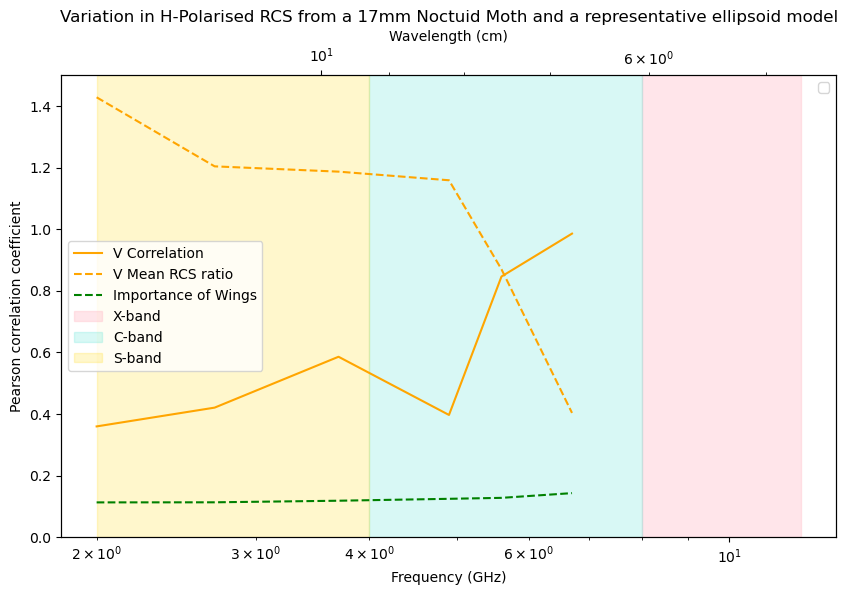

In [22]:
wavelengths = wavelength(frequencies)

body_wavelength_ratio = (0.3*1.7)/np.array(wavelengths)

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.plot(frequencies, V_corrs, label='V Correlation', color = 'orange', linestyle = '-')
plt.plot(frequencies, V_mean_ratio, label = 'V Mean RCS ratio', color = 'orange', linestyle = '--')
plt.plot(frequencies, dielectrics['Wing Importance'][0:6], label = 'Importance of Wings', color = 'g', linestyle = '--')
plt.title('Variation in H-Polarised RCS from a 17mm Noctuid Moth and a representative ellipsoid model')
plt.ylabel('Pearson correlation coefficient')
plt.xlabel('Frequency (GHz)')
plt.ylim(0,1.5)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

plt.axvspan(8, 12, color='pink', alpha=0.4, label='X-band')
plt.axvspan(4, 8, color='turquoise', alpha=0.2, label='C-band')
plt.axvspan(2, 4, color='gold', alpha=0.2, label='S-band')
plt.legend()

# Create the second x-axis (wavelength)
ax2 = plt.twiny()  # Create a second axes sharing the y-axis

# Set the x-axis limits for wavelength, corresponding to the frequency limits
ax2.set_xscale('log') # Important: Set the scale to logarithmic
ax2.set_xlim(wavelengths[0], wavelengths[5]) # calculate wavelength limits and reverse them!
ax2.set_xlabel('Wavelength (cm)')

plt.legend()

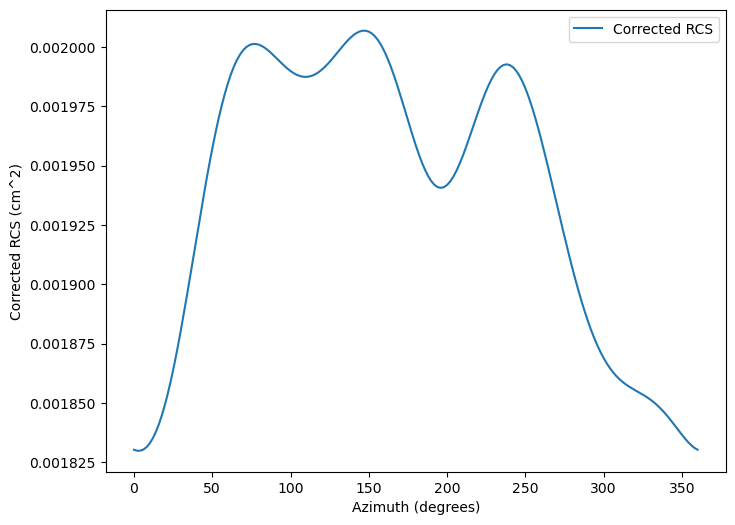

In [23]:
plot_corrected_rcs(single_pol_obj_dict['Bernard']['1000']['V'][1])

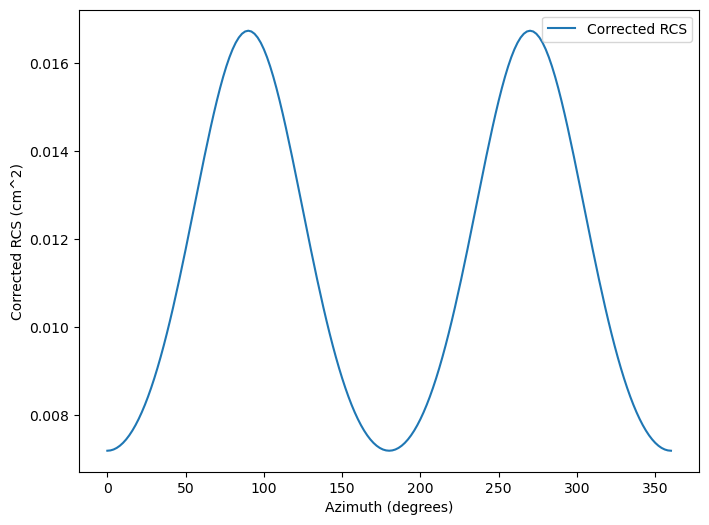

In [24]:
plot_corrected_rcs(single_pol_obj_dict['Ellipsoid']['1000']['V'][3])

# 0553 V high res sweep

In [25]:
frequency_name_list_0553 = ['020', '027', '037', '049', '067', '090', '120', '160', '220', '300']
frequencies_0553 = [2,2.7,3.7,4.9,6.7,9,12,16,22,30]

Convert Bernards to csvs

In [26]:
for scale in ['0553']:
    for polarisation in ['V']:
        for freq in frequency_name_list_0553:    
            path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_DICT_PKL/' + f'Bernard_0250_{scale}_sweep_{polarisation}_{freq}_dict.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_CSV/' + f'Bernard_0250_{scale}_{polarisation}_{freq}_df.csv'

            df.to_csv(output_path)

Convert Ellipsoids to csvs

In [27]:
for scale in ['0553']:
    for polarisation in ['V']:#['H', 'V']:
        for freq in frequency_name_list_0553:
            path = BASE_DRIVE_PATH + f'Ellipsoid/{scale}/' + f'{polarisation}_DICT_PKL/' + f'Ellipsoid_{scale}_sweep_{polarisation}_{freq}_dict.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + f'Ellipsoid/{scale}/' + f'{polarisation}_CSV/' + f'Ellipsoid_{scale}_sweep_{polarisation}_{freq}_df.csv'

            df.to_csv(output_path)

Update single pol obj dict

In [28]:
model = 'Bernard'
pol = 'V'
scale = '0553'


for freq in frequency_name_list_0553:
    path = BASE_DRIVE_PATH + f'{model}/' + f'{scale}/{pol}_CSV/' + f'{model}_0250_{scale}_{pol}_{freq}_df.csv'
    single_pol_obj_dict[model][scale][pol].append(pd.read_csv(path))

In [29]:
model = 'Ellipsoid'
pol = 'V'
scale = '0553'

for freq in frequency_name_list_0553:
    path = BASE_DRIVE_PATH + 'Ellipsoid/' + f'{scale}/{pol}_CSV/' + f'{model}_{scale}_sweep_{pol}_{freq}_df.csv'
    single_pol_obj_dict[model][scale][pol].append(pd.read_csv(path))

In [30]:
V_corrs_0553 = []
V_mean_ratio_0553 = []

for freq in range(len(frequency_name_list_0553)):
    V_corrs_0553.append(single_pol_obj_dict['Bernard']['0553']['V'][freq]['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid']['0553']['V'][freq]['Corrected_RCS']))
    V_mean_ratio_0553.append(single_pol_obj_dict['Bernard']['0553']['V'][freq]['Corrected_RCS'].mean() / single_pol_obj_dict['Ellipsoid']['0553']['V'][freq]['Corrected_RCS'].mean())

/tmp/ipykernel_85785/1531613347.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


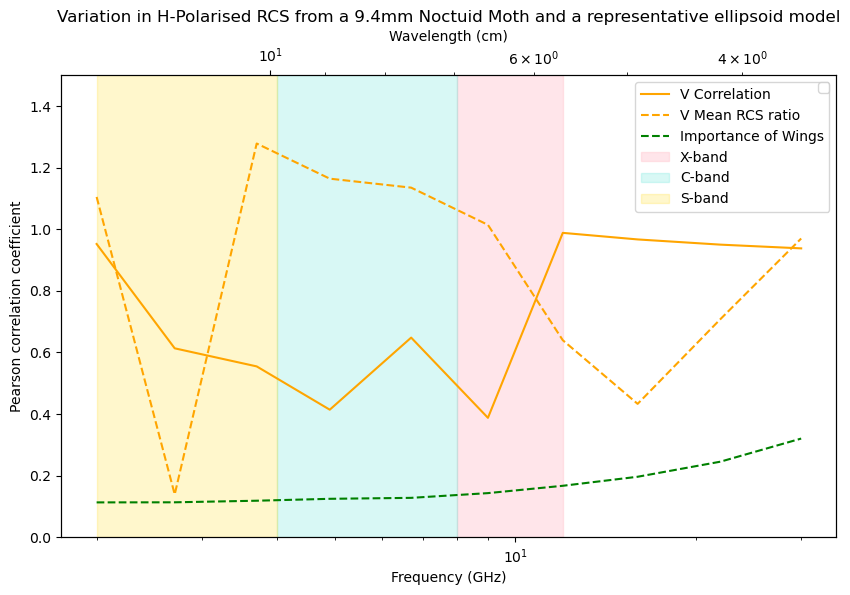

In [31]:
wavelengths = wavelength(frequencies_0553)

body_wavelength_ratio = (0.3*1.7)/np.array(wavelengths)

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.plot(frequencies_0553, V_corrs_0553, label='V Correlation', color = 'orange', linestyle = '-')
plt.plot(frequencies_0553, V_mean_ratio_0553, label = 'V Mean RCS ratio', color = 'orange', linestyle = '--')
plt.plot(frequencies_0553, dielectrics['Wing Importance'], label = 'Importance of Wings', color = 'g', linestyle = '--')
plt.title('Variation in H-Polarised RCS from a 9.4mm Noctuid Moth and a representative ellipsoid model')
plt.ylabel('Pearson correlation coefficient')
plt.xlabel('Frequency (GHz)')
plt.ylim(0,1.5)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

plt.axvspan(8, 12, color='pink', alpha=0.4, label='X-band')
plt.axvspan(4, 8, color='turquoise', alpha=0.2, label='C-band')
plt.axvspan(2, 4, color='gold', alpha=0.2, label='S-band')

plt.legend()

# Create the second x-axis (wavelength)
ax2 = plt.twiny()  # Create a second axes sharing the y-axis

# Set the x-axis limits for wavelength, corresponding to the frequency limits
ax2.set_xscale('log') # Important: Set the scale to logarithmic
ax2.set_xlim(wavelengths[0], wavelengths[5]) # calculate wavelength limits and reverse them!
ax2.set_xlabel('Wavelength (cm)')

plt.legend()

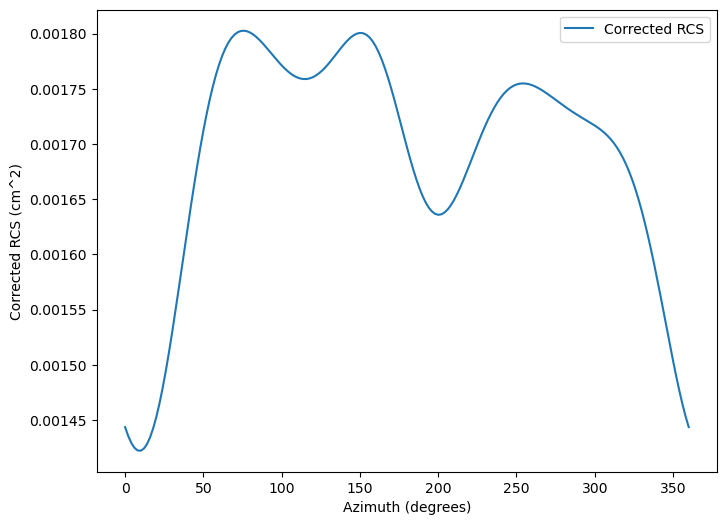

In [32]:
plot_corrected_rcs(single_pol_obj_dict['Bernard']['0553']['V'][4])

# Removing the legs

Generate csvs for no leg Bernards

In [33]:
for scale in ['1000']:
    for polarisation in ['V']:
        for freq in frequency_name_list_0553:    
            path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_DICT_PKL/' + f'Bernard_0250_{scale}_sweep_{polarisation}_{freq}_no_leg_dict.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_CSV/' + f'Bernard_0250_{scale}_{polarisation}_{freq}_no_leg_df.csv'

            df.to_csv(output_path)

In [34]:
model = 'Bernard'
pol = 'V'
scale = '1000'


for freq in frequency_name_list_0553:
    path = BASE_DRIVE_PATH + f'{model}/' + f'{scale}/{pol}_CSV/' + f'{model}_0250_{scale}_{pol}_{freq}_no_leg_df.csv'
    single_pol_obj_dict[model][scale][f'{pol}_no_leg'].append(pd.read_csv(path))

Putting all 10 frequencies for the ellipsoid in the no leg box

In [35]:
model = 'Ellipsoid'
pol = 'V'


for freq in frequency_name_list_0553:
    path = BASE_DRIVE_PATH + 'Ellipsoid/' + f'{scale}/{pol}_CSV/' + f'{model}_{scale}_sweep_{pol}_{freq}_df.csv'
    single_pol_obj_dict[model][scale][f'{pol}_no_leg'].append(pd.read_csv(path))

In [36]:
len(single_pol_obj_dict['Bernard']['1000']['V'])

6

In [37]:
V_corrs_NL = []
V_mean_ratio_NL = []

for freq in range(len(frequency_name_list_0553)):
    V_corrs_NL.append(single_pol_obj_dict['Bernard']['1000']['V_no_leg'][freq]['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid']['1000']['V_no_leg'][freq]['Corrected_RCS']))
    V_mean_ratio_NL.append(single_pol_obj_dict['Bernard']['1000']['V_no_leg'][freq]['Corrected_RCS'].mean() / single_pol_obj_dict['Ellipsoid']['1000']['V_no_leg'][freq]['Corrected_RCS'].mean())

/tmp/ipykernel_85785/210687048.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


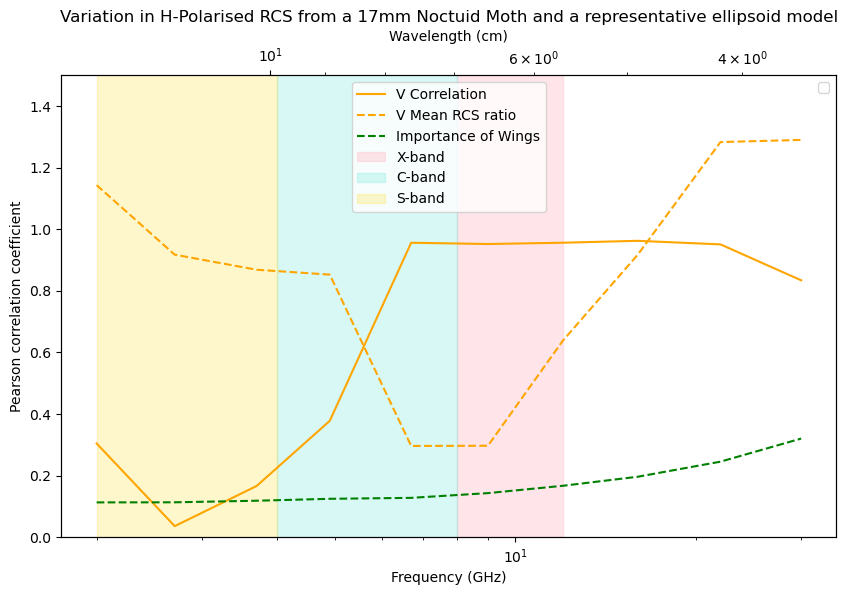

In [38]:
wavelengths = wavelength(frequencies_0553)

body_wavelength_ratio = (0.3*1.7)/np.array(wavelengths)

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.plot(frequencies_0553, V_corrs_NL, label='V Correlation', color = 'orange', linestyle = '-')
plt.plot(frequencies_0553, V_mean_ratio_NL, label = 'V Mean RCS ratio', color = 'orange', linestyle = '--')
plt.plot(frequencies_0553, dielectrics['Wing Importance'], label = 'Importance of Wings', color = 'g', linestyle = '--')
plt.title('Variation in H-Polarised RCS from a 17mm Noctuid Moth and a representative ellipsoid model')
plt.ylabel('Pearson correlation coefficient')
plt.xlabel('Frequency (GHz)')
plt.ylim(0,1.5)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

plt.axvspan(8, 12, color='pink', alpha=0.4, label='X-band')
plt.axvspan(4, 8, color='turquoise', alpha=0.2, label='C-band')
plt.axvspan(2, 4, color='gold', alpha=0.2, label='S-band')

plt.legend()

# Create the second x-axis (wavelength)
ax2 = plt.twiny()  # Create a second axes sharing the y-axis

# Set the x-axis limits for wavelength, corresponding to the frequency limits
ax2.set_xscale('log') # Important: Set the scale to logarithmic
ax2.set_xlim(wavelengths[0], wavelengths[5]) # calculate wavelength limits and reverse them!
ax2.set_xlabel('Wavelength (cm)')

plt.legend()

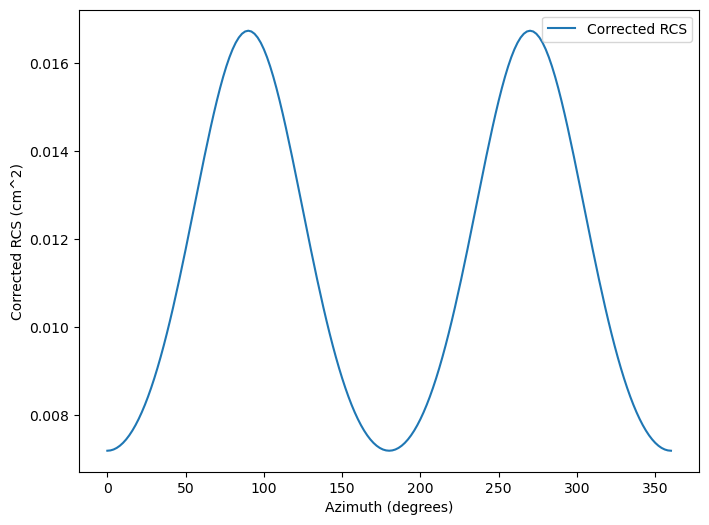

In [39]:
plot_corrected_rcs(single_pol_obj_dict['Ellipsoid']['1000']['V_no_leg'][3])

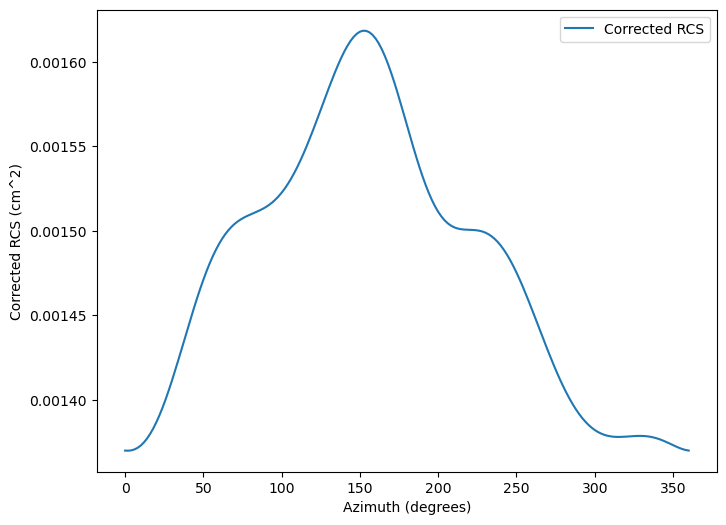

In [40]:
plot_corrected_rcs(single_pol_obj_dict['Bernard']['1000']['V_no_leg'][1])

# 0375 decimation no wings or legs

### Load in 

In [41]:
scale = '1000'
polarisation = 'v'
            
path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_DICT_PKL/' + f'Bernard_0375_1000_V_027_no_leg_wing.pkl'
conv = converter.from_pickle(path)
B_0375_no_leg_wing_df = conv.generate_output_df()

output_path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_CSV/' + f'Bernard_375_1000_V_027_no_leg_wing_df.csv'

B_0375_no_leg_wing_df.to_csv(output_path)

In [42]:
scale = '1000'
polarisation = 'v'
            
path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_DICT_PKL/' + f'Bernard_0250_1000_V_027_no_leg_wing.pkl'
conv = converter.from_pickle(path)
B_0250_no_leg_wing_df = conv.generate_output_df()

output_path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_CSV/' + f'Bernard_0250_1000_V_027_no_leg_wing_df.csv'

B_0250_no_leg_wing_df.to_csv(output_path)

### Ellipsoid

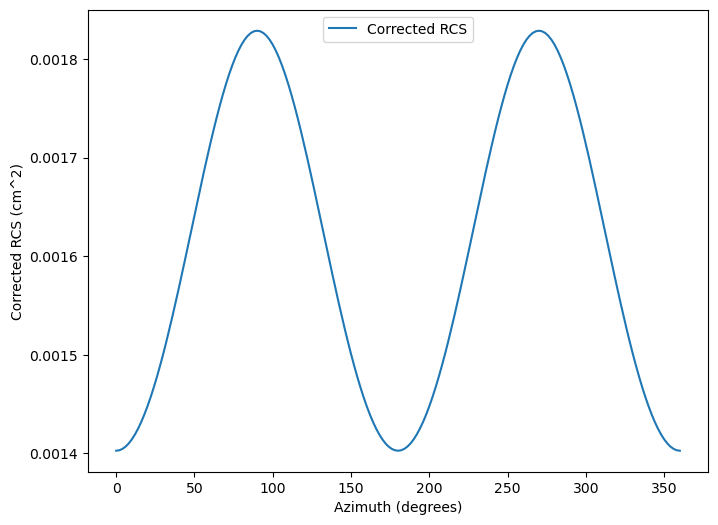

In [43]:
plot_corrected_rcs(single_pol_obj_dict['Ellipsoid']['1000']['V_no_leg'][1])

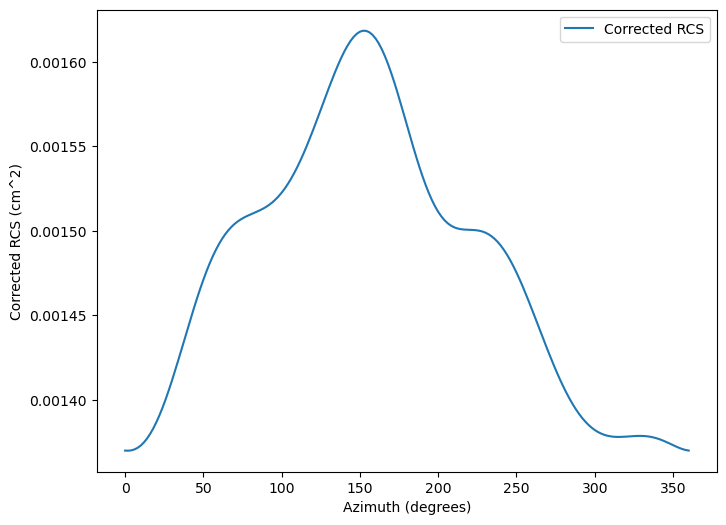

In [44]:
plot_corrected_rcs(single_pol_obj_dict['Bernard']['1000']['V_no_leg'][1])

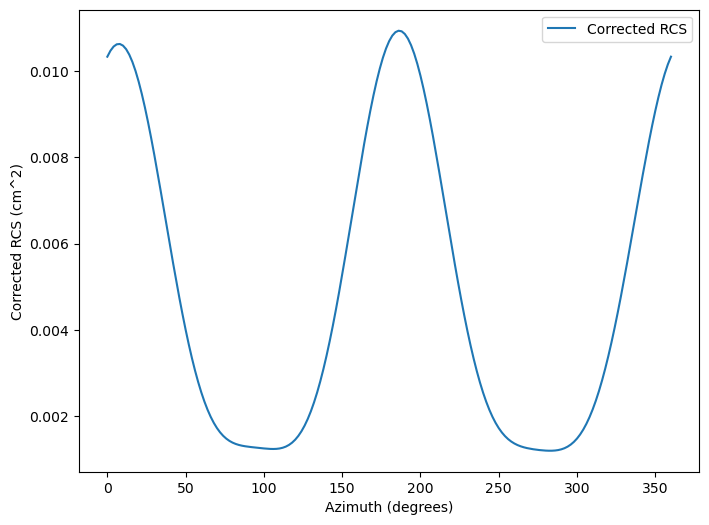

In [45]:
plot_corrected_rcs(B_0250_no_leg_wing_df)

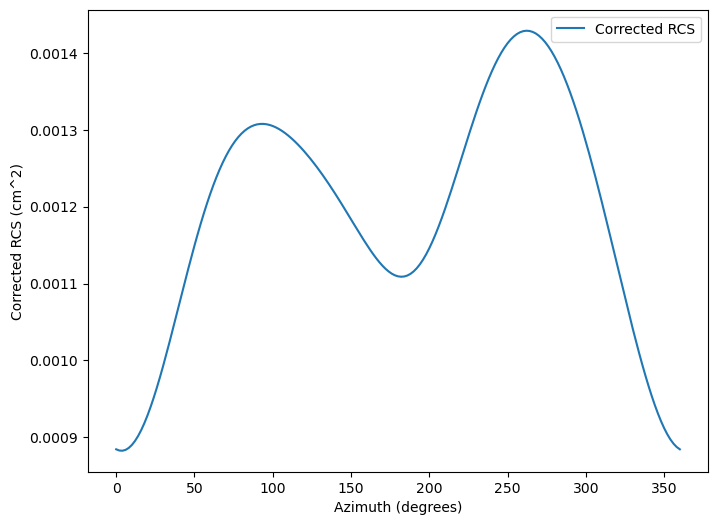

In [46]:
plot_corrected_rcs(B_0375_no_leg_wing_df)

## 0250 1000 sweep with legs

In [47]:
remaining_frequency_name_list = ['090', '120', '160', '220', '300']
remaining_frequencies = [9,12,16,22,30]

In [48]:
for scale in ['1000']:
    for polarisation in ['V']:
        for freq in remaining_frequency_name_list:    
            path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_DICT_PKL/' + f'Bernard_0250_{scale}_{polarisation}_{freq}.pkl'
            conv = converter.from_pickle(path)
            df = conv.generate_output_df()
            
            output_path = BASE_DRIVE_PATH + f'Bernard/{scale}/' + f'{polarisation}_CSV/' + f'Bernard_0250_{scale}_{polarisation}_{freq}_df.csv'

            df.to_csv(output_path)

In [49]:
full_v_pol_sweep = {y : {x : {'V' : []} for x in  ['1000']} for y in ['Bernard']}

In [50]:
model = 'Bernard'
pol = 'V'
scale = '1000'


for freq in frequency_name_list_0553:
    path = BASE_DRIVE_PATH + f'{model}/' + f'{scale}/{pol}_CSV/' + f'{model}_0250_{scale}_{pol}_{freq}_df.csv'
    full_v_pol_sweep[model][scale][f'{pol}'].append(pd.read_csv(path))

In [51]:
V_corrs_full = []
V_mean_ratio_full = []

for freq in range(len(frequency_name_list_0553)):
    V_corrs_full.append(full_v_pol_sweep['Bernard']['1000']['V'][freq]['Corrected_RCS'].corr(single_pol_obj_dict['Ellipsoid']['1000']['V_no_leg'][freq]['Corrected_RCS']))
    V_mean_ratio_full.append(full_v_pol_sweep['Bernard']['1000']['V'][freq]['Corrected_RCS'].mean() / single_pol_obj_dict['Ellipsoid']['1000']['V_no_leg'][freq]['Corrected_RCS'].mean())

/tmp/ipykernel_85785/10348078.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


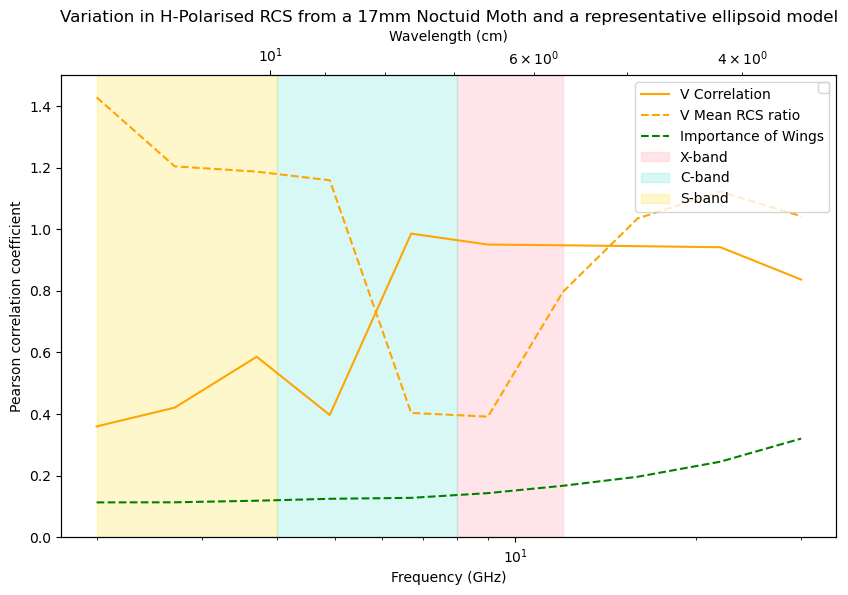

In [52]:
wavelengths = wavelength(frequencies_0553)

body_wavelength_ratio = (0.3*1.7)/np.array(wavelengths)

plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.plot(frequencies_0553, V_corrs_full, label='V Correlation', color = 'orange', linestyle = '-')
plt.plot(frequencies_0553, V_mean_ratio_full, label = 'V Mean RCS ratio', color = 'orange', linestyle = '--')
plt.plot(frequencies_0553, dielectrics['Wing Importance'], label = 'Importance of Wings', color = 'g', linestyle = '--')
plt.title('Variation in H-Polarised RCS from a 17mm Noctuid Moth and a representative ellipsoid model')
plt.ylabel('Pearson correlation coefficient')
plt.xlabel('Frequency (GHz)')
plt.ylim(0,1.5)
# plt.axvline(x=3.2/0.64, color='r', linestyle='--', label='X-band')
# plt.axvline(x=5/0.64, color='g', linestyle='--', label='C-band')
# plt.axvline(x=10/0.64, color='pink', linestyle='--', label='S-band')

plt.axvspan(8, 12, color='pink', alpha=0.4, label='X-band')
plt.axvspan(4, 8, color='turquoise', alpha=0.2, label='C-band')
plt.axvspan(2, 4, color='gold', alpha=0.2, label='S-band')

plt.legend()

# Create the second x-axis (wavelength)
ax2 = plt.twiny()  # Create a second axes sharing the y-axis

# Set the x-axis limits for wavelength, corresponding to the frequency limits
ax2.set_xscale('log') # Important: Set the scale to logarithmic
ax2.set_xlim(wavelengths[0], wavelengths[5]) # calculate wavelength limits and reverse them!
ax2.set_xlabel('Wavelength (cm)')

plt.legend()